## MLE Approach

In [26]:
import pandas as pd
from Models.ECIR_new import ECIRModel
from Models.CIRModel import BasicCIRModel
import numpy as np
import matplotlib.pyplot as plt

### Merge Dataframe

In [27]:
import pandas as pd

# Load the DGS_30 data
dgs_30_path = 'DGS_30.csv'
dgs_30_data = pd.read_csv(dgs_30_path)

# Load the DGS3MO data
dgs3mo_path = 'DGS3MO.csv'
dgs3mo_data = pd.read_csv(dgs3mo_path)

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data
# Check the result
data.head()

,DGS3MO,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-01,17.010,17.0600,16.780,16.57,16.350396,16.120,15.898415,15.710,15.573295,15.478799,...,15.070462,15.049236,15.025332,14.997763,14.965539,14.927672,14.883173,14.831054,14.770326,14.7000
1981-09-02,16.650,17.1600,16.780,16.43,16.225968,16.090,15.924878,15.750,15.604572,15.490415,...,15.103136,15.093330,15.078842,15.057928,15.028848,14.989861,14.939224,14.875196,14.796035,14.7000
1981-09-03,16.960,17.3100,16.900,16.48,16.262789,16.140,15.967593,15.780,15.640102,15.546094,...,15.194779,15.177243,15.156281,15.130776,15.099616,15.061687,15.015875,14.961065,14.896145,14.8200
1981-09-04,16.640,17.2400,16.890,16.52,16.302912,16.170,16.019604,15.860,15.720523,15.604793,...,15.237907,15.232570,15.222048,15.204398,15.177676,15.139941,15.089248,15.023655,14.941220,14.8400
1981-09-07,16.565,17.2775,16.935,16.55,16.336354,16.215,16.066772,15.905,15.767511,15.657616,...,15.328694,15.324179,15.314622,15.298188,15.273045,15.237358,15.189294,15.127019,15.048698,14.9525


### CIR Model

#### Yield Rate Prediction

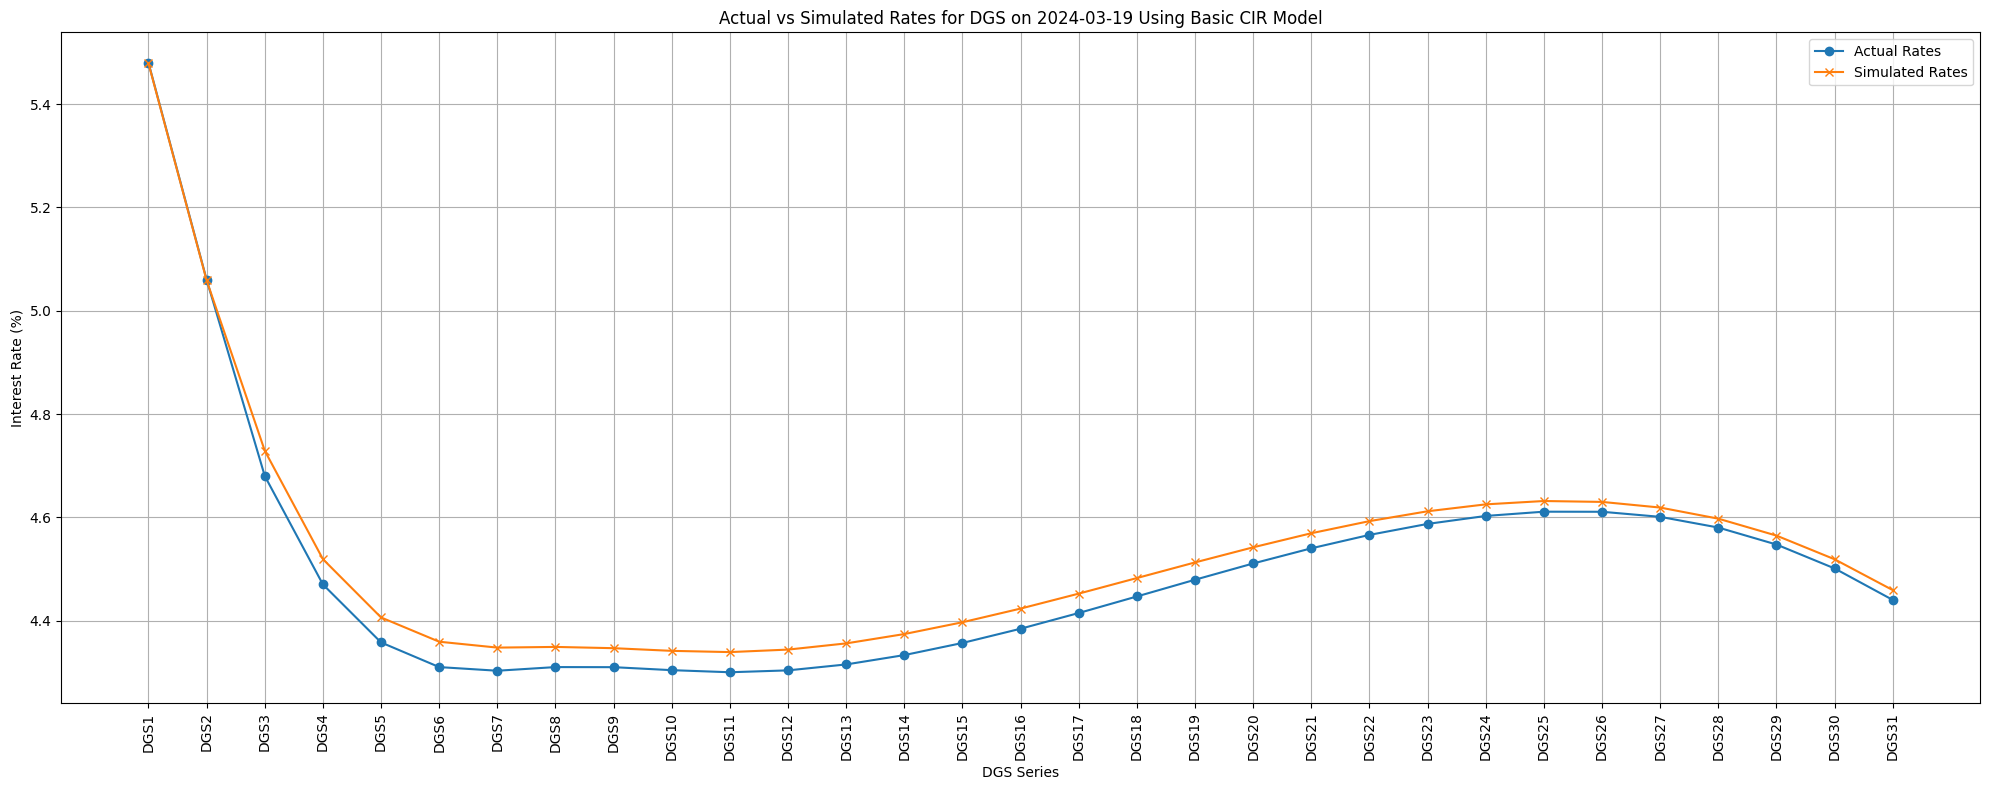

In [28]:
# Optimized parameters provided by the user
optimized_params = {
    "kappa": 0.0565,
    "mu_r": 0.0996,
    "sigma": 0.0124
}

# Creating an instance of the BasicCIRModel with the optimized parameters
basic_cir_model = BasicCIRModel(**optimized_params)


# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date from the mock data
# (Replace this with the actual data loading code in practice)
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate using BasicCIRModel
def simulate_single_rate_cir(model, initial_rate):
    dt = 1 / 252  # Assume dt is 1 day as we simulate just for the next day
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS using BasicCIRModel
simulated_rates_cir = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        simulated_rates_cir[column] = simulate_single_rate_cir(basic_cir_model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_cir_df = pd.DataFrame(simulated_rates_cir, index=[simulation_date])


# Combine actual and simulated rates into one DataFrame for comparison
comparison_data_cir = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_cir_df.iloc[0]
})

# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]


# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('CIR2.png')  # This line will save the figure as 'CIR.png'

plt.show()  # This will display the plot in the output


In [29]:
comparison_data_cir 

,Actual Rates,Simulated Rates
DGS3MO,5.480000,5.478810
DGS1,5.060000,5.058738
DGS2,4.680000,4.728883
DGS3,4.470000,4.518984
DGS4,4.357705,4.406075
DGS5,4.310000,4.359119
DGS6,4.302930,4.347712
DGS7,4.310000,4.349044
DGS8,4.309832,4.346584
DGS9,4.304042,4.341431


#### Bond Price Prediction

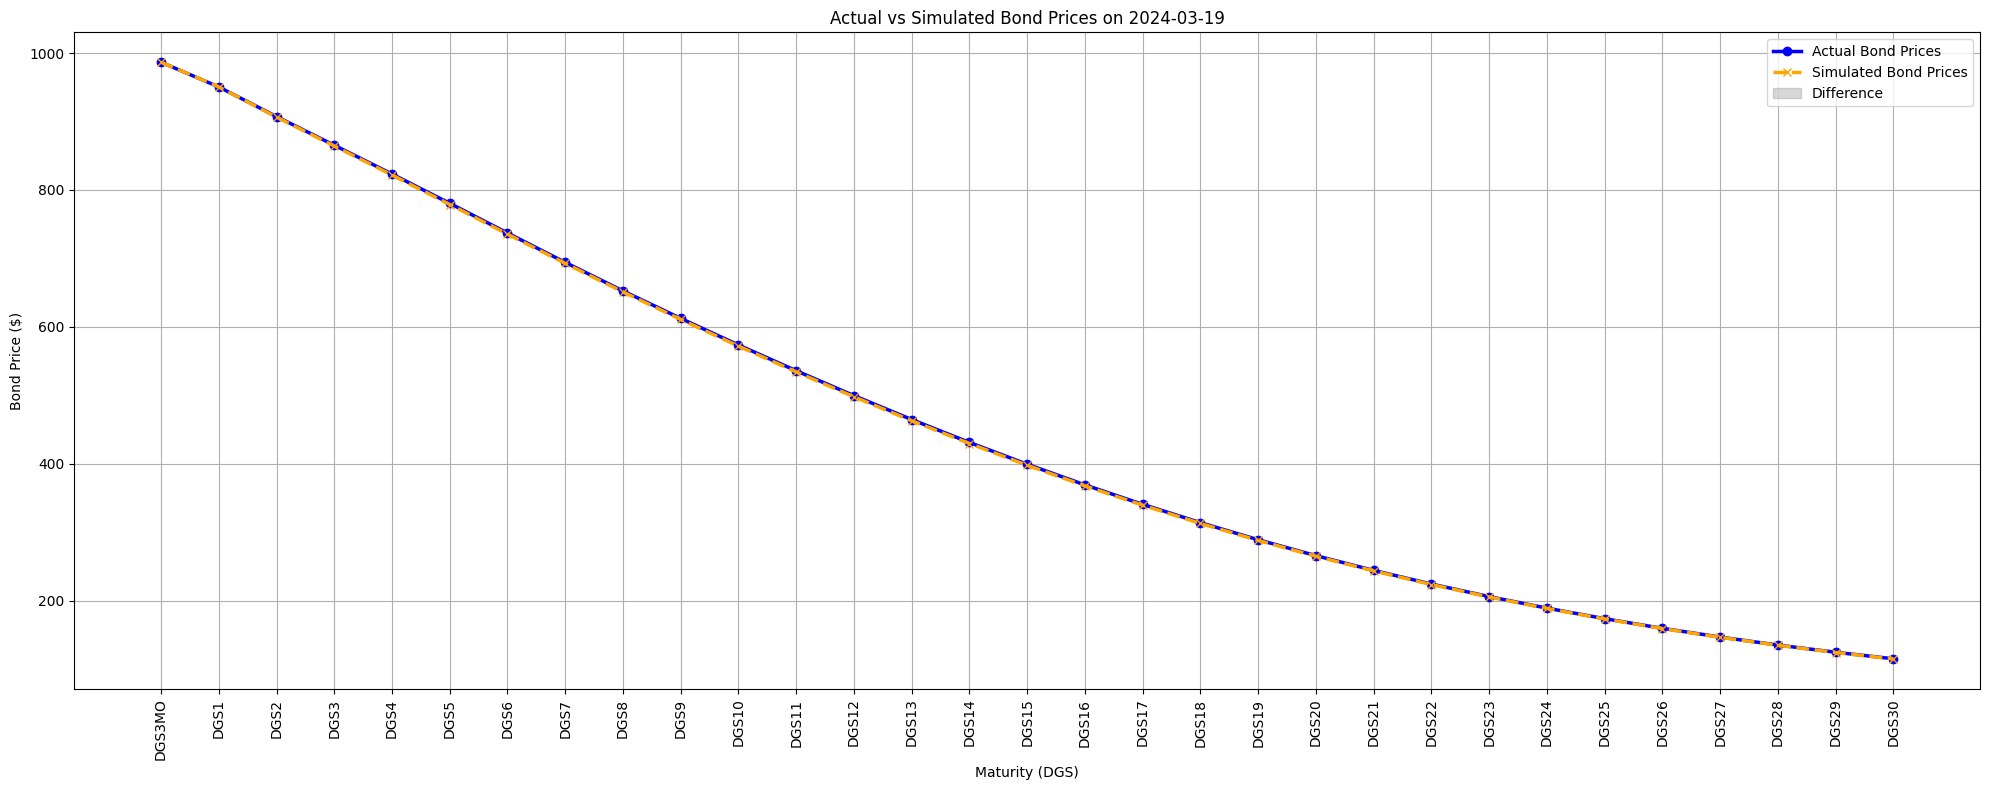

In [30]:
# Define the bond's face value
face_value = 1000  # For example, the face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)

# Function to calculate bond price using the CIR model for zero-coupon bonds
def calculate_bond_price_cir(model, rt, T, t=0):
    # Since the exact_solution assumes zero t, we adjust T by subtracting t
    adjusted_maturity = T - t
    return model.exact_solution(rt, adjusted_maturity)


# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
                simulated_rate = model.next_rate(last_rate, 1/252)  
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                continuous_rate = nominal_to_continuous(simulated_rate)
                
                bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
                simulated_bond_prices[column] = bond_price
            except ValueError:
                continue
    return simulated_bond_prices


# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_nominal_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
                last_continuous_rate = nominal_to_continuous(last_nominal_rate)
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                
                # Calculate bond price using the continuous rate
                bond_price = calculate_bond_price_cir(basic_cir_model, last_continuous_rate, maturity) * face_value
                actual_bond_prices[column] = bond_price
            except ValueError:
                continue
    return actual_bond_prices

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame from the simulated bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])# Function to calculate actual bond prices using the same formula as for simulated prices


# Create a DataFrame from the actual bond prices
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})


# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()
plt.savefig('CIR_bondprice2.png')
# Show the plot
plt.show()



In [31]:
combined_bond_prices_df

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,986.670586,986.665860
DGS1,950.513339,950.507770
DGS2,907.256224,906.419864
DGS3,865.371418,864.225347
DGS4,823.280179,821.828093
DGS5,780.482251,778.756440
DGS6,737.167734,735.496422
DGS7,694.191123,692.622296
DGS8,652.546338,651.038217
DGS9,612.389961,610.782537


### ECIR Model


#### Yield Curve Rate

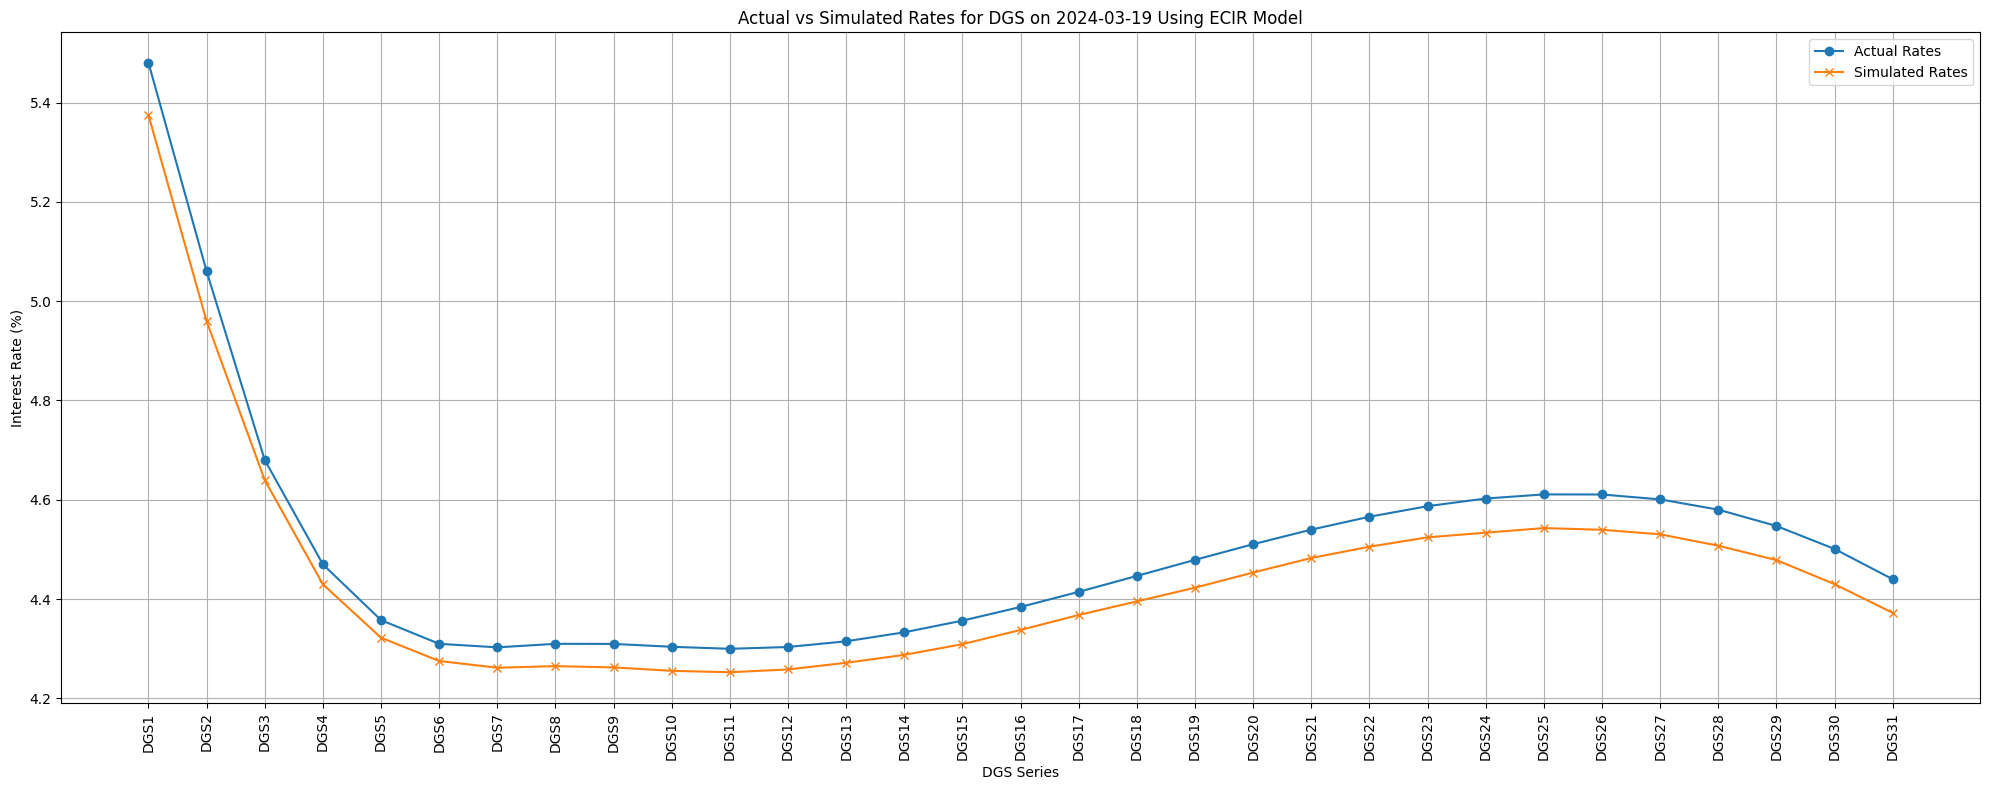

In [32]:
# Model parameters
params = {
    "kappa": 4.989,
    "mu_r": 0.05481,
    "sigma": 0.01116,
    "mu": 0.00000,
    "gamma": 0.05628
}

# Creating an instance of the ECIRModel
model2 = ECIRModel(**params)# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate
def simulate_single_rate(model2, initial_rate):
    # Assume dt is 1 day as we simulate just for the next day
    dt = 1 / 252
    return model2.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS
simulated_rates = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        # Get the initial rate from the previous available data point
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        # Simulate the rate using the model2
        simulated_rates[column] = simulate_single_rate(model2, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_df = pd.DataFrame(simulated_rates, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_df.iloc[0]
})



# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using ECIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ECIR2.png')
plt.show()


In [33]:
comparison_data

,Actual Rates,Simulated Rates
DGS3MO,5.480000,5.374443
DGS1,5.060000,4.959479
DGS2,4.680000,4.639587
DGS3,4.470000,4.429748
DGS4,4.357705,4.322286
DGS5,4.310000,4.275426
DGS6,4.302930,4.261883
DGS7,4.310000,4.265091
DGS8,4.309832,4.262546
DGS9,4.304042,4.255624


#### Bond Price Prediction

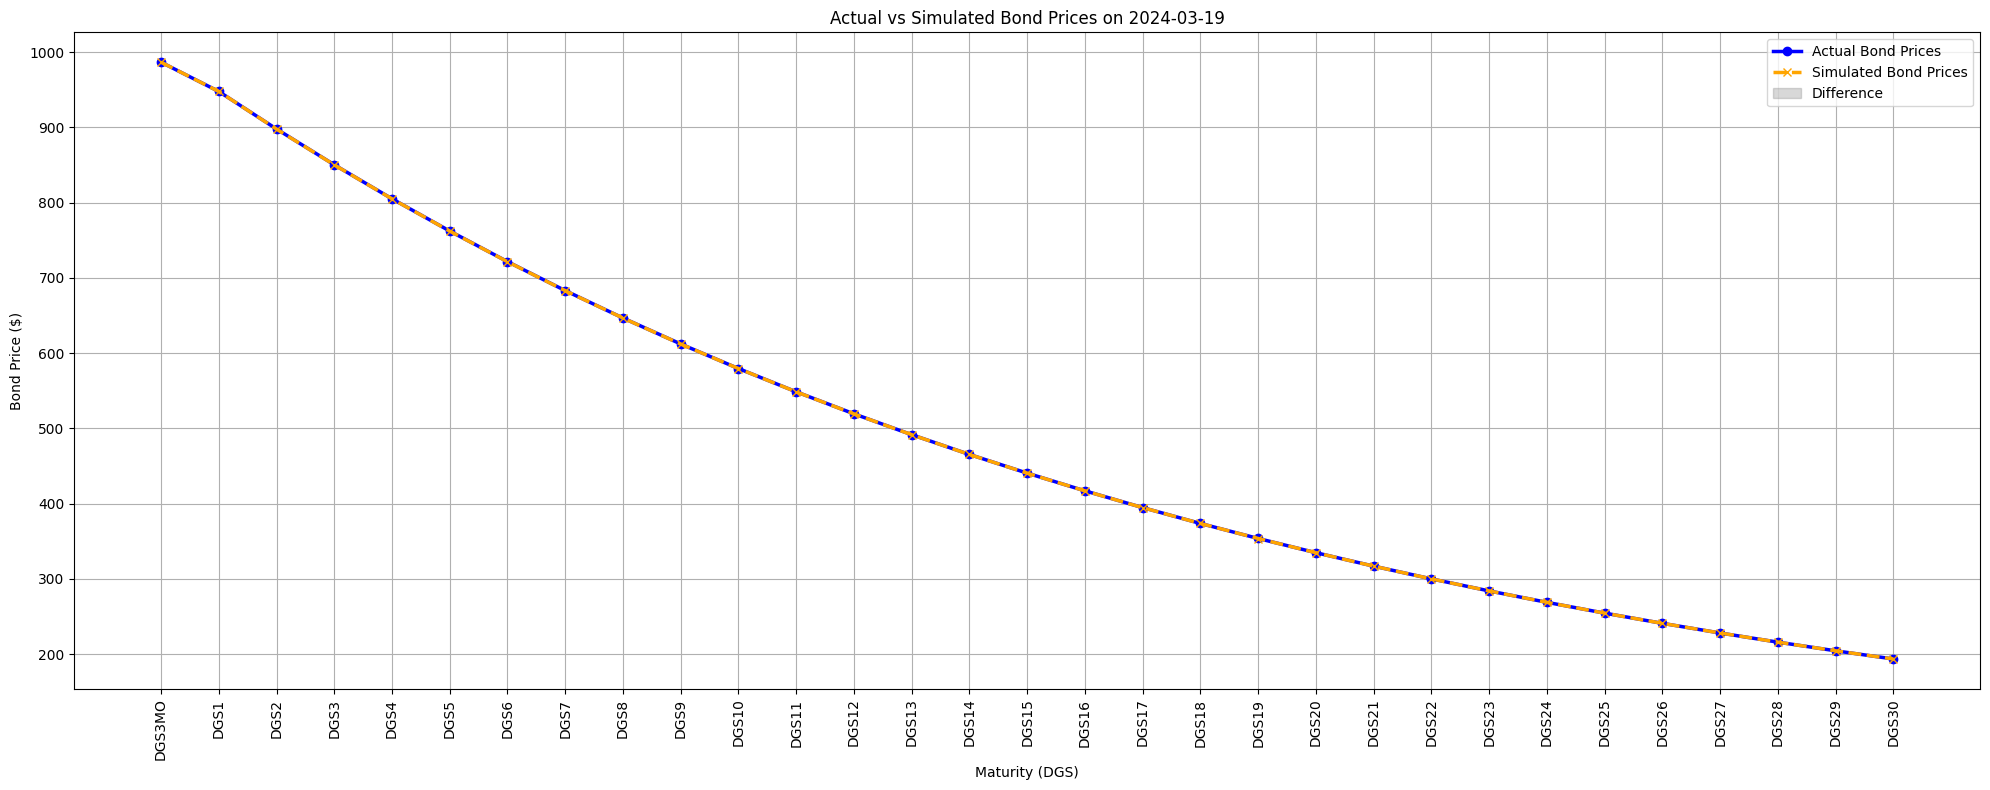

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the bond's face value
face_value = 1000  # The face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)


# def calculate_bond_price_ecir(model2, rt, T, t=0):
#     return model.bond_price(rt, T, t)
def calculate_bond_price_ecir(model2, rt, T, t=0):
    # Since the exact_solution assumes zero t, we adjust T by subtracting t
    adjusted_maturity = T - t
    return model2.exact_solution(rt, adjusted_maturity)

# Function to simulate bond prices
def simulate_bond_prices(model2, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
            simulated_rate = model2.next_rate(last_rate, 1/252)  # Simulating next rate
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            continuous_rate = nominal_to_continuous(simulated_rate)
            bond_price = calculate_bond_price_ecir(model2, continuous_rate, maturity) * face_value
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
            continuous_rate = nominal_to_continuous(last_rate)
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            bond_price = calculate_bond_price_ecir(model2, continuous_rate, maturity) * face_value
            actual_bond_prices[column] = bond_price
    return actual_bond_prices


# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-03-19')
ecir_model = ECIRModel(kappa=4.989, mu_r=0.05481, sigma=0.01116,mu= 0.00000,gamma=0.05628 )  # Example model parameters

# Simulate bond prices
simulated_bond_prices2 = simulate_bond_prices(ecir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices2 = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df2 = pd.DataFrame(simulated_bond_prices2, index=[simulation_date])
actual_bond_prices_df2 = pd.DataFrame(actual_bond_prices2, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df2 = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df2.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df2.iloc[0]
})

# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df2.index, combined_bond_prices_df2['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df2.index, combined_bond_prices_df2['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df2.index, 
                 combined_bond_prices_df2['Actual Bond Prices'], 
                 combined_bond_prices_df2['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()
plt.savefig('ECIR_bondprice2.png')
# Show the plot
plt.show()



In [35]:
combined_bond_prices_df2

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,986.596546,986.599460
DGS1,947.692469,947.673309
DGS2,897.805853,897.682619
DGS3,850.263734,850.162528
DGS4,805.088560,804.988244
DGS5,762.219117,762.122694
DGS6,721.576061,721.461040
DGS7,683.081612,682.973305
DGS8,646.649751,646.581543
DGS9,612.167578,612.084977


### Absolute Error of Yield Rate

In [36]:
comparison_data_cir['Absolute Error CIR'] = (comparison_data_cir['Actual Rates'] - comparison_data_cir['Simulated Rates']).abs()
comparison_data['Absolute Error ECIR'] = (comparison_data['Actual Rates'] - comparison_data['Simulated Rates']).abs()
# Select only the 'Absolute Error CIR' column from comparison_data_cir
comparison_data_cir_errors = comparison_data_cir[['Absolute Error CIR']]

# Select only the 'Absolute Error ECIR' column from comparison_data
comparison_data_errors = comparison_data[['Absolute Error ECIR']]

# Merge the DataFrames on their index
combined_error_data = comparison_data_cir_errors.join(comparison_data_errors)

# Now combined_error_data DataFrame should have the columns:
# 'Absolute Error CIR' and 'Absolute Error ECIR'
combined_error_data

,Absolute Error CIR,Absolute Error ECIR
DGS3MO,0.001190,0.105557
DGS1,0.001262,0.100521
DGS2,0.048883,0.040413
DGS3,0.048984,0.040252
DGS4,0.048370,0.035419
DGS5,0.049119,0.034574
DGS6,0.044782,0.041047
DGS7,0.039044,0.044909
DGS8,0.036753,0.047286
DGS9,0.037388,0.048419


### Absolute Error of Bond Price

In [37]:
combined_bond_prices_df['Absolute Error CIR'] = (combined_bond_prices_df['Actual Bond Prices'] - combined_bond_prices_df['Simulated Bond Prices']).abs()
combined_bond_prices_df2['Absolute Error ECIR'] = (combined_bond_prices_df2['Actual Bond Prices'] - combined_bond_prices_df2['Simulated Bond Prices']).abs()

combined_bond_prices_errors = combined_bond_prices_df[['Absolute Error CIR']]

# Select only the 'Absolute Error ECIR' column from comparison_data
combined_bond_prices2_errors = combined_bond_prices_df2[['Absolute Error ECIR']]

# Merge the DataFrames on their index
combined_error_data2 = combined_bond_prices_errors .join(combined_bond_prices2_errors)

# Now combined_error_data DataFrame should have the columns:
# 'Absolute Error CIR' and 'Absolute Error ECIR'
combined_error_data2

,Absolute Error CIR,Absolute Error ECIR
DGS3MO,0.004726,0.002914
DGS1,0.005569,0.019159
DGS2,0.836360,0.123234
DGS3,1.146071,0.101206
DGS4,1.452085,0.100316
DGS5,1.725811,0.096422
DGS6,1.671312,0.115021
DGS7,1.568827,0.108307
DGS8,1.508121,0.068207
DGS9,1.607424,0.082601
